<a href="https://colab.research.google.com/github/rohanSSiddeshwara/traffic_sign_classification/blob/main/Traffic_sign_classification_001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rohanssiddeshwara","key":"d9d427e0d6f44cf141423766996c6a24"}'}

In [2]:
!mkdir -p ~/.kaggle

!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d ahemateja19bec1025/traffic-sign-dataset-classification

 96% 183M/190M [00:02<00:00, 95.6MB/s]
100% 190M/190M [00:02<00:00, 77.9MB/s]


In [ ]:
!unzip traffic-sign-dataset-classification.zip

In [5]:
import os 
len(os.listdir("/content/traffic_Data/DATA"))

58

In [6]:
data_counts={}
class_name=[]
images=[]
for i in sorted(os.listdir("/content/traffic_Data/DATA")):
  for image in os.listdir("/content/traffic_Data/DATA/"+str(i)):
    class_name.append(str(i))
    images.append(image)
  
data_counts={'class_name':class_name,"image": images}
print(data_counts)

{'class_name': ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '1

In [7]:
import pandas as pd

data=pd.DataFrame(data_counts)
data.describe()

,class_name,image
count,4170,4170
unique,58,4170
top,28,000_1_0002.png
freq,446,1


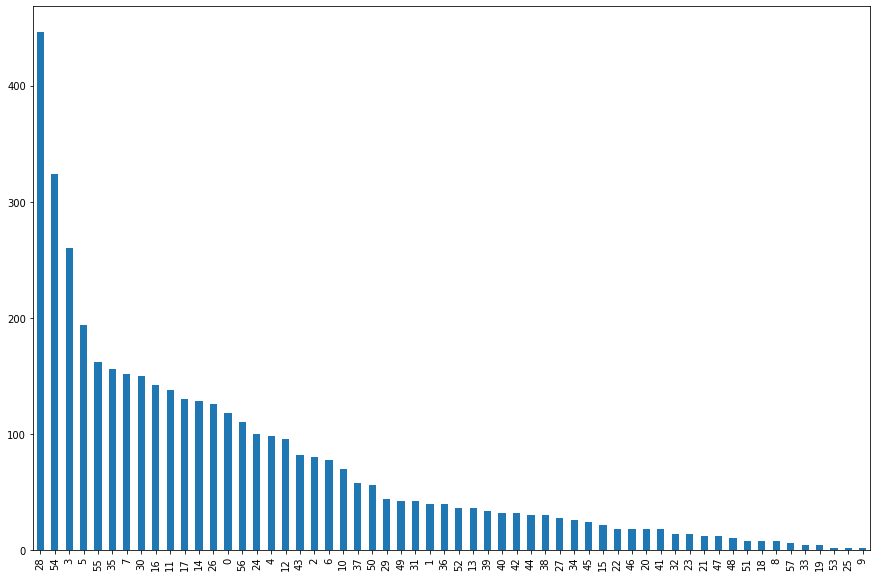

In [8]:
data["class_name"].value_counts().plot(kind='bar' ,figsize=(15,10))

In [9]:
from sklearn.model_selection import train_test_split
import seaborn as sns

X = data['image']
y = data['class_name']

train,test=train_test_split(data,test_size=0.2,stratify=data['class_name'])

len(train),len(test)

(3336, 834)

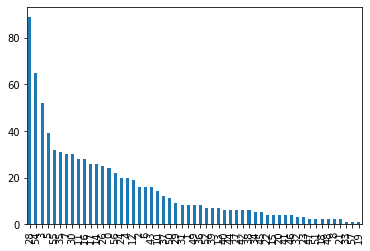

In [10]:
test['class_name'].value_counts().plot(kind='bar')

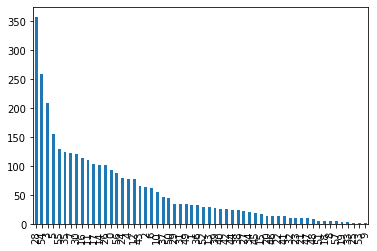

In [11]:
train['class_name'].value_counts().plot(kind='bar')

In [12]:
train

,class_name,image
1856,3,003_1_0116.png
2839,43,043_1_0010.png
2961,46,046_1_0005.png
3765,55,055_0056.png
1709,28,028_1_0050.png
...,...,...
1263,26,026_1_0023.png
3815,56,056_1_0007.png
2285,32,032_1_0001.png
2292,34,034_1_0004_1_j.png


In [13]:
import os
import shutil

def create_train_test_dir(train_dataframe,test_dataframe):
  source_folder='/content/traffic_Data/DATA/'
  train_dir="/content/traffic_Data/Train"
  test_dir="/content/traffic_Data/Test"
  os.mkdir(train_dir)
  os.mkdir(test_dir)

  for file_name in train_dataframe.values:
    # construct full file path
    source = source_folder +'/'+ file_name[0]+'/'+file_name[1]
    destination = train_dir +'/'+ file_name[0]+'/'+file_name[1]
    # move only files
    if os.path.isfile(source):
        if os.path.exists(train_dir +'/'+ file_name[0] and test_dir +'/'+ file_name[0]):
          shutil.copy(source, destination)
        else:
          os.mkdir(train_dir +'/'+ file_name[0])
          os.mkdir(test_dir +'/'+ file_name[0])
          shutil.copy(source, destination)
    
  
  for file_name in test_dataframe.values:
    # construct full file path
    source = source_folder +'/'+ file_name[0]+'/'+file_name[1]
    destination = test_dir +'/'+ file_name[0]+'/'+file_name[1]
    # move only files
    if os.path.isfile(source):
        if os.path.exists(test_dir +'/'+ file_name[0]):
          shutil.copy(source, destination)
        else:
          print("error")

In [14]:
create_train_test_dir(train_dataframe=train,test_dataframe=test)

In [217]:
train_dir='/content/traffic_Data/Train'
test_dir='/content/traffic_Data/Test'
IMG_SIZE=(64,64)

import tensorflow as tf
IMG_SIZE = (224, 224)
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 label_mode="categorical",
                                                                 image_size=IMG_SIZE,
                                                                 ba)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE,
                                                                shuffle=False) # don't shuffle test data for prediction analysis

Found 3336 files belonging to 58 classes.
Found 834 files belonging to 58 classes.


In [218]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img


Image shape: (153, 161, 3)


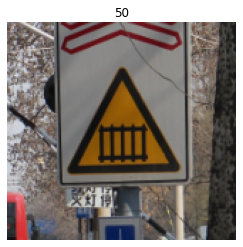

In [219]:
# View a random image from the training dataset
img = view_random_image(target_dir="/content/traffic_Data/Train/",
                        target_class="50")

In [220]:
img.shape

(153, 161, 3)

In [221]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "/content/traffic_Data/Train/"
test_dir = "/content/traffic_Data/Test/"

# Import data from directories and turn it into batches
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                  label_mode="categorical",
                                                                  image_size=(48, 48),
                                                                 )

valid_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=(48,48),
                                                                shuffle=False) # don't shuffle test data for prediction analysis


Found 3336 files belonging to 58 classes.
Found 834 files belonging to 58 classes.


In [222]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model (a clone of model_8, except to be multi-class)
model = Sequential([
  tf.keras.Input(shape=(48,48,3)),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(58, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [223]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_139 (Conv2D)         (None, 46, 46, 10)        280       
                                                                 
 conv2d_140 (Conv2D)         (None, 44, 44, 10)        910       
                                                                 
 max_pooling2d_73 (MaxPoolin  (None, 22, 22, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_141 (Conv2D)         (None, 20, 20, 10)        910       
                                                                 
 conv2d_142 (Conv2D)         (None, 18, 18, 10)        910       
                                                                 
 max_pooling2d_74 (MaxPoolin  (None, 9, 9, 10)         0         
 g2D)                                                 

In [224]:
history=model.fit(train_data,
          epochs=5,
          steps_per_epoch=len(train_data),
          validation_data=valid_data,
          validation_steps=int(0.25*len(valid_data)))

Epoch 1/5
105/105 [==============================] - 4s 32ms/step - loss: 3.9302 - accuracy: 0.3291 - val_loss: 1.4412 - val_accuracy: 0.6510
Epoch 2/5
105/105 [==============================] - 3s 31ms/step - loss: 0.7907 - accuracy: 0.7992 - val_loss: 0.4895 - val_accuracy: 0.8958
Epoch 3/5
105/105 [==============================] - 3s 30ms/step - loss: 0.2932 - accuracy: 0.9200 - val_loss: 0.2326 - val_accuracy: 0.9688
Epoch 4/5
105/105 [==============================] - 3s 30ms/step - loss: 0.1528 - accuracy: 0.9598 - val_loss: 0.1431 - val_accuracy: 0.9688
Epoch 5/5
105/105 [==============================] - 3s 30ms/step - loss: 0.0671 - accuracy: 0.9838 - val_loss: 0.1393 - val_accuracy: 0.9688


In [225]:
model.evaluate(valid_data)

27/27 [==============================] - 1s 32ms/step - loss: 0.2286 - accuracy: 0.9580


[0.22861897945404053, 0.958033561706543]

In [226]:
import matplotlib.pyplot as plt

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

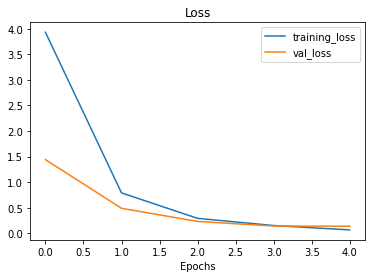

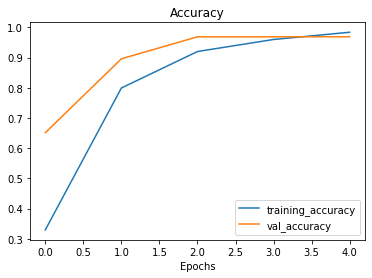

In [227]:
plot_loss_curves(history)

In [228]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-09-19 02:55:43--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-09-19 02:55:44 (83.4 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [229]:
# Note: This might take a minute or so due to unravelling 790 batches
y_labels = []
for images, labels in valid_data.unbatch(): # unbatch the test data and get images and labels
  y_labels.append(labels.numpy().argmax()) # append the index which has the largest value (labels are one-hot)
y_labels[:10] # check what they look like (unshuffled)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [230]:
y_pred_proba=model.predict(valid_data)
y_pred=y_pred_proba.argmax(axis=1)
y_pred[:10]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0, 23])

In [231]:
from helper_functions import calculate_results

calculate_results(y_true=y_labels,y_pred=y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 95.80335731414868,
 'precision': 0.9549099999984744,
 'recall': 0.9580335731414868,
 'f1': 0.954187194293851}

In [239]:
# Import the required modules for model creation
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

# Setup data augmentation
data_augmentation = Sequential([
  preprocessing.RandomFlip("horizontal"), # randomly flip images on horizontal edge
  preprocessing.RandomRotation(0.2), # randomly rotate images by a specific amount
  preprocessing.RandomHeight(0.2), # randomly adjust the height of an image by a specific amount
  preprocessing.RandomWidth(0.2), # randomly adjust the width of an image by a specific amount
  preprocessing.RandomZoom(0.2), # randomly zoom into an image
  preprocessing.Rescaling(1./255), # keep for models like ResNet50V2, remove for EfficientNet
], name="data_augmentation")

In [268]:
train_data_augmented=train_data.map(lambda x,y:(data_augmentation(x,training=True),y))

In [272]:
train_data_augmented

<MapDataset element_spec=(TensorSpec(shape=(None, None, None, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 58), dtype=tf.float32, name=None))>

In [241]:
model = Sequential([
  tf.keras.Input(shape=(48,48,3)),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(58, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

In [255]:
inputs=tf.keras.Input(shape=(48,48,3))
x=tf.keras.layers.Normalization()(inputs)
outputs = model(x)
model_2=tf.keras.Model(inputs,outputs)

In [279]:
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(), # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_2.summary()

Model: "model_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_61 (InputLayer)       [(None, 48, 48, 3)]       0         
                                                                 
 normalization_1 (Normalizat  (None, 48, 48, 3)        7         
 ion)                                                            
                                                                 
 sequential_4 (Sequential)   (None, 58)                50048     
                                                                 
Total params: 50,055
Trainable params: 50,048
Non-trainable params: 7
_________________________________________________________________


In [281]:
history_2=model_2.fit(train_data,
          epochs=5,
          steps_per_epoch=len(train_data),
          validation_data=valid_data,
          validation_steps=int(0.25*len(valid_data)))

Epoch 1/5
105/105 [==============================] - 6s 50ms/step - loss: 0.0591 - accuracy: 0.9859 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 2/5
105/105 [==============================] - 3s 31ms/step - loss: 0.0027 - accuracy: 0.9997 - val_loss: 2.3319e-04 - val_accuracy: 1.0000
Epoch 3/5
105/105 [==============================] - 3s 31ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 1.1762e-04 - val_accuracy: 1.0000
Epoch 4/5
105/105 [==============================] - 3s 31ms/step - loss: 5.5967e-04 - accuracy: 1.0000 - val_loss: 8.9441e-05 - val_accuracy: 1.0000
Epoch 5/5
105/105 [==============================] - 3s 31ms/step - loss: 4.0629e-04 - accuracy: 1.0000 - val_loss: 6.2366e-05 - val_accuracy: 1.0000


In [282]:
y_pred_proba=model_2.predict(valid_data)
y_pred=y_pred_proba.argmax(axis=1)
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [284]:
model_2.save("traffic_sign_v1")

In [283]:

calculate_results(y_true=y_labels,y_pred=y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 99.28057553956835,
 'precision': 0.9914649476999597,
 'recall': 0.9928057553956835,
 'f1': 0.9915517377815465}

In [286]:
model_2.evaluate(valid_data)

27/27 [==============================] - 1s 29ms/step - loss: 0.1339 - accuracy: 0.9928


[0.1339271366596222, 0.9928057789802551]

In [291]:
def load_and_prep_image(filename, img_shape=224, scale=True):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).

  Parameters
  ----------
  filename (str): string filename of target image
  img_shape (int): size to resize target image to, default 224
  scale (bool): whether to scale pixel values to range(0, 1), default True
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.io.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img

In [298]:
class_names=train_data.class_names
image = load_and_prep_image('/content/traffic_Data/TEST/010_1_0011_1_j.png',img_shape=48,scale=False)
pred_prob=model_2.predict(tf.expand_dims(image, axis=0))
pred_class = class_names[pred_prob.argmax()]
pred_class

'10'

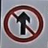

In [301]:
tf.keras.utils.array_to_img(image)

In [302]:
model_2.save("traffic_sign_v1.h5")

In [304]:
model_test=tf.keras.models.load_model('/content/traffic_sign_v1.h5')

In [306]:
model_test.evaluate(valid_data)

27/27 [==============================] - 1s 29ms/step - loss: 0.1339 - accuracy: 0.9928


[0.1339271366596222, 0.9928057789802551]

In [321]:
import pandas as pd

data=pd.read_csv("/content/labels.csv")
data[data['ClassId']==10]['Name']

10    Dont Go straight
Name: Name, dtype: object

In [312]:
int(pred_class)

10

In [325]:
import tensorflow as tf

model_test=tf.keras.models.load_model('/content/traffic_sign_v1.h5')

def predict(image_path,model):
    # Read the model
  # model=tf.keras.models.load_model(model_path)
    # Read in the image
  img = tf.io.read_file(image_path)
  # Decode it into a tensor
  img = tf.io.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, [48, 48])
  # predict the output
  pred_prob=model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[pred_prob.argmax()]

  data=pd.read_csv("/content/labels.csv")
  label=data[data['ClassId']==int(pred_class)]['Name']

  return label


26    keep Right
Name: Name, dtype: object

In [327]:

predict(image_path='/content/traffic_Data/TEST/011_1_0026_1_j.png',model=model_test)

11    Dont Go Left
Name: Name, dtype: object